# Import dependencies

In [1]:
import random
import os

import cv2
from matplotlib import pyplot as plt

import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.logger import setup_logger

setup_logger()

<Logger detectron2 (DEBUG)>

# Limited the usage of GPU


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Prepare dataset

In [3]:
# Register the coco instance
DATASET_NAME = "midv500"

register_coco_instances(
    DATASET_NAME,
    {},
    "/data/card-segmentation/midv500/midv500_coco.json",
    "/data/card-segmentation/midv500/",
)

# Create metadata for training set
train_metadata = MetadataCatalog.get(DATASET_NAME)

# Create data dictionary for training set
train_dataset_dicts = DatasetCatalog.get(DATASET_NAME)

[07/24 16:24:59 d2.data.datasets.coco]: Loaded 14748 images in COCO format from /data/card-segmentation/midv500/midv500_coco.json


# Visualize the dataset

[07/24 16:24:59 d2.data.datasets.coco]: Loaded 14748 images in COCO format from /data/card-segmentation/midv500/midv500_coco.json


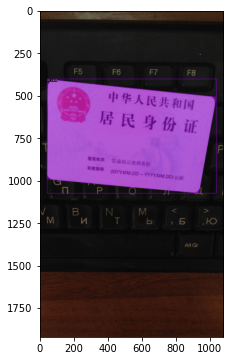

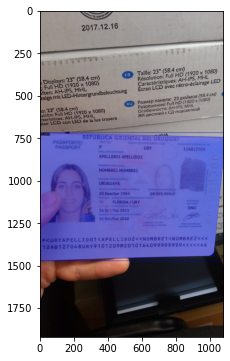

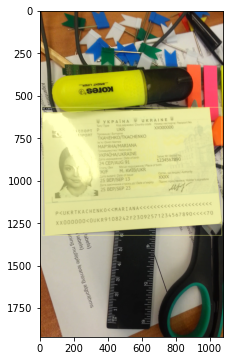

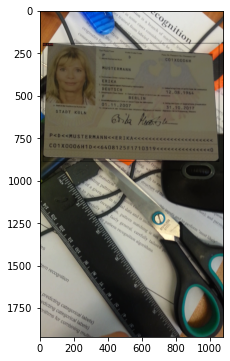

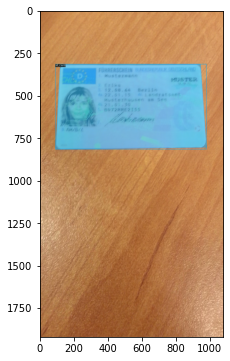

In [4]:
dataset_dicts = DatasetCatalog.get(DATASET_NAME)
for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

# Model training

In [5]:
# Setup the configuration for model
cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
)
cfg.DATASETS.TRAIN = (DATASET_NAME,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[07/24 16:25:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[07/24 16:25:07 d2.data.datasets.coco]: Loaded 14748 images in COCO format from /data/card-segmentation/midv500/midv500_coco.json
[07/24 16:25:07 d2.data.build]: Removed 0 images with no usable annotations. 14748 images left.
[07/24 16:25:08 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  id_card   | 14748        |
|            |              |
[07/24 16:25:08 d2.data.common]: Serializing 14748 elements to byte tensors and concatenating them all ...
[07/24 16:25:08 d2.data.common]: Serialized dataset takes 4.38 MiB
[07/24 16:25:08 d2.data.dataset_mapper]: Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[07/24 16:25:08 d2.data.build]: Using training sampler TrainingSampler


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[07/24 16:25:08 d2.engine.train_loop]: Starting training from iteration 0
[07/24 16:25:16 d2.utils.events]:  eta: 0:05:56  iter: 19  total_loss: 1.372  loss_cls: 0.544  loss_box_reg: 0.128  loss_mask: 0.681  loss_rpn_cls: 0.003  loss_rpn_loc: 0.010  time: 0.3599  data_time: 0.0145  lr: 0.000005  max_mem: 2673M
[07/24 16:25:27 d2.utils.events]:  eta: 0:05:50  iter: 39  total_loss: 1.285  loss_cls: 0.485  loss_box_reg: 0.144  loss_mask: 0.647  loss_rpn_cls: 0.004  loss_rpn_loc: 0.009  time: 0.3590  data_time: 0.0048  lr: 0.000010  max_mem: 2673M
[07/24 16:25:34 d2.utils.events]:  eta: 0:05:49  iter: 59  total_loss: 1.108  loss_cls: 0.374  loss_box_reg: 0.141  loss_mask: 0.595  loss_rpn_cls: 0.005  loss_rpn_loc: 0.008  time: 0.3629  data_time: 0.0048  lr: 0.000015  max_mem: 2673M
[07/24 16:25:42 d2.utils.events]:  eta: 0:05:41  iter: 79  total_loss: 0.961  loss_cls: 0.275  loss_box_reg: 0.137  loss_mask: 0.530  loss_rpn_cls: 0.009  loss_rpn_loc: 0.011  time: 0.3627  data_time: 0.0050  lr:

[07/24 16:29:31 d2.utils.events]:  eta: 0:01:59  iter: 679  total_loss: 0.114  loss_cls: 0.024  loss_box_reg: 0.044  loss_mask: 0.040  loss_rpn_cls: 0.000  loss_rpn_loc: 0.004  time: 0.3649  data_time: 0.0062  lr: 0.000170  max_mem: 2673M
[07/24 16:29:38 d2.utils.events]:  eta: 0:01:52  iter: 699  total_loss: 0.104  loss_cls: 0.022  loss_box_reg: 0.039  loss_mask: 0.038  loss_rpn_cls: 0.000  loss_rpn_loc: 0.004  time: 0.3648  data_time: 0.0046  lr: 0.000175  max_mem: 2673M
[07/24 16:29:46 d2.utils.events]:  eta: 0:01:44  iter: 719  total_loss: 0.105  loss_cls: 0.022  loss_box_reg: 0.037  loss_mask: 0.035  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.3645  data_time: 0.0044  lr: 0.000180  max_mem: 2673M
[07/24 16:29:53 d2.utils.events]:  eta: 0:01:37  iter: 739  total_loss: 0.097  loss_cls: 0.023  loss_box_reg: 0.034  loss_mask: 0.037  loss_rpn_cls: 0.001  loss_rpn_loc: 0.004  time: 0.3646  data_time: 0.0053  lr: 0.000185  max_mem: 2673M
[07/24 16:30:01 d2.utils.events]:  eta: 0:01

# Visualize the prediction result

[07/24 16:37:11 d2.data.datasets.coco]: Loaded 14748 images in COCO format from /data/card-segmentation/midv500/midv500_coco.json


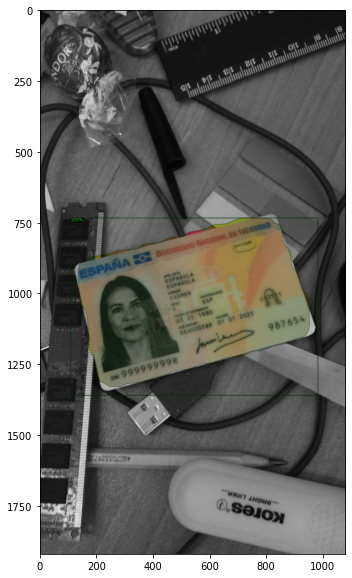

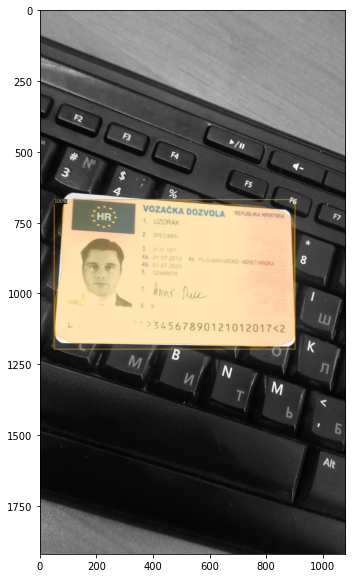

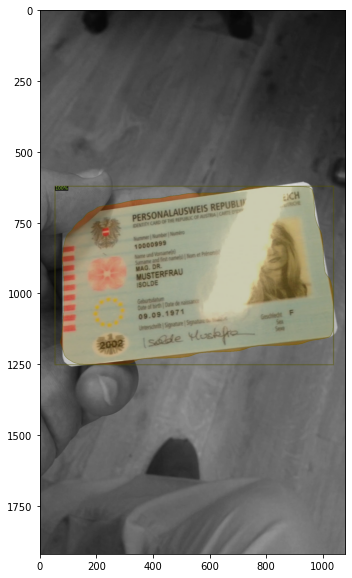

In [7]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = (DATASET_NAME,)
predictor = DefaultPredictor(cfg)


dataset_dicts = DatasetCatalog.get(DATASET_NAME)
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(
        im[:, :, ::-1],
        metadata=train_metadata,
        scale=1,
        instance_mode=ColorMode.IMAGE_BW,  # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize=(14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()